# Calibrating your Scores

## Clonal Frequency

If your data contains clonal frequency, we have provided an adjustment score function, for the TCRs probability to be associated with cancer to be adjusted accordingly to the clonal frequency proportion

We aim to adjusted lowly clonally expanded sequences and low probability output to be even lower score, while highly clonally expanded sequences and high probability to be even higher score



In [15]:
!pip install tcrgnn

To acheive that, we will require the model output file in this format: sequence,score column in a txt or csv file

and a list of clonal frquency as2sociated with the TCR sequence.

For this data example, we will load it from a CSV

Remember to use the write_scores_to_txt function (see evaluating_model.ipynb)

In [16]:
from tcrgnn import transform_scores
import pandas as pd

cancer_df_clonal_freq = pd.read_csv('sample_data/clonal_freqs/02-0063_412343_T_R_22HWGCLT3_GAGGTTAGAC-AATGTATTGC_R1_cdr3_trb_frequencies.csv')
cancer_df_clonal_freq

transformed_scores = transform_scores(
    model_output_txt="cancer_test_data_scores.txt",
    counts=cancer_df_clonal_freq,
)
transformed_scores

array([1.        , 1.        , 1.        , 0.95200016, 0.74635341,
       1.        , 0.92964395, 0.72913368, 1.        , 1.        ,
       0.94885792, 0.84752621, 1.        , 0.07464306, 0.94991507,
       0.22862813, 1.        , 1.        , 0.98863228, 1.        ,
       0.81538447, 1.        , 0.48717167, 0.74656852, 0.45650028,
       0.23393618, 1.        , 0.92839219, 1.        , 0.31603791,
       0.39591422, 0.92616888, 0.3257321 , 0.45464097, 0.98239477,
       0.90152122, 0.91838564, 0.10404728, 0.52062269, 0.80167003,
       0.1685261 , 1.        , 0.2702192 , 0.92694809, 1.        ,
       0.72913368])

In [17]:
## Now we can add compare the transformed scores to the original scores
original_scores = pd.read_csv("cancer_test_data_scores.txt", sep=",", header=None, names=["sequence", "score"])
comparison_df = original_scores.copy()
comparison_df["transformed_score"] = transformed_scores
comparison_df


,sequence,score,transformed_score
0,CAIGRGGANEKLFF,0.986985,1.000000
1,CNIVGTGALTDTQYF,0.999964,1.000000
2,CNIVGTGDRNQPQHF,0.999321,1.000000
3,CASSDRQGRYTGELFF,0.932924,0.952000
4,CASSMSTTWGELFF,0.727277,0.746353
5,CSVDHRVSEQFF,0.999218,1.000000
6,CATSSARRQFF,0.910568,0.929644
7,CSVRVNTEAFF,0.710057,0.729134
8,CAAYLQTNTEAFF,0.959737,1.000000
9,CASSQEAPRGRPYEQYF,0.994688,1.000000


In [18]:
# define inverse logit (sigmoid)
def inv_logit(x):
    return 1 / (1 + np.exp(-x))

# compute means
inv_logit_mean_score = inv_logit(comparison_df["score"]).mean()
inv_logit_mean_transformed = inv_logit(comparison_df["transformed_score"]).mean()

print(f"Inverse logit mean (original scores): {inv_logit_mean_score:.6f}")
print(f"Inverse logit mean (transformed scores): {inv_logit_mean_transformed:.6f}")

Inverse logit mean (original scores): 0.674109
Inverse logit mean (transformed scores): 0.677485


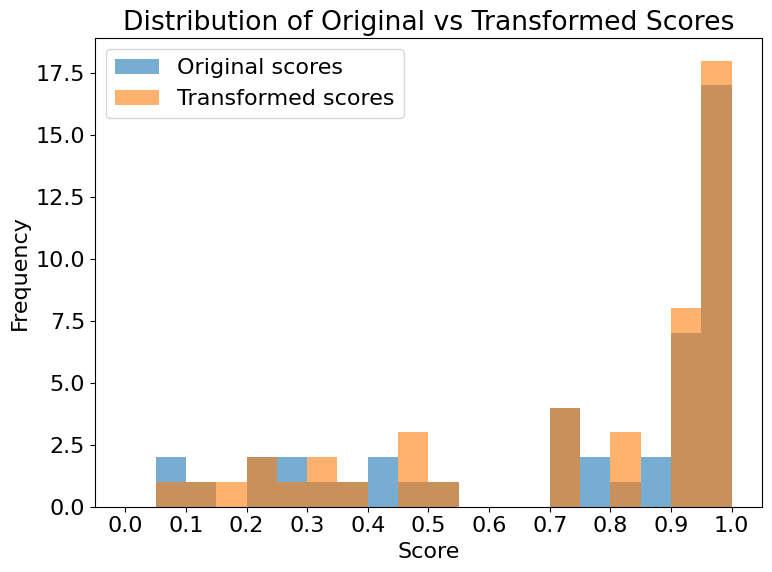

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Compute common range
xmin = min(comparison_df["score"].min(), comparison_df["transformed_score"].min())
xmax = max(comparison_df["score"].max(), comparison_df["transformed_score"].max())

# Round to one decimal for neat tick alignment
xmin = np.floor(xmin * 10) / 10
xmax = np.ceil(xmax * 10) / 10

# Bins: uniform across the full range, step of 0.05 (adjustable)
bins = np.arange(xmin, xmax + 0.05, 0.05)

# Plot
plt.figure(figsize=(8, 6))
plt.hist(comparison_df["score"], bins=bins, alpha=0.6, label="Original scores")
plt.hist(comparison_df["transformed_score"], bins=bins, alpha=0.6, label="Transformed scores")

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Original vs Transformed Scores")
plt.legend()

# Set x-axis ticks every 0.1
plt.xticks(np.arange(xmin, xmax + 0.1, 0.1))

plt.tight_layout()
plt.show()


In [20]:
control_df_clonal_freq = pd.read_csv('sample_data/clonal_freqs/20241106_WGS_20241106_sc_PICA0033-PICA0069_Pool_5_0_cdr3_results.csv')

transformed_scores = transform_scores(
    model_output_txt="control_test_data_scores.txt",
    counts=control_df_clonal_freq,
)
transformed_scores

array([0.13131079, 0.49105476, 0.830869  , ..., 1.        , 0.91258697,
       0.90652154], shape=(4120,))

In [21]:
## Now we can add compare the transformed scores to the original scores
original_scores = pd.read_csv("control_test_data_scores.txt", sep=",", header=None, names=["sequence", "score"])
comparison_df = original_scores.copy()
comparison_df["transformed_score"] = transformed_scores
comparison_df


,sequence,score,transformed_score
0,CSASPGRSGDTQYF,0.113176,0.131311
1,CASSESGETGELFF,0.472920,0.491055
2,CASSDLGVSTDTQYF,0.812734,0.830869
3,CASSLIARTDNEQFF,0.944759,0.962894
4,CASSQESTASYEQYF,0.903327,0.921462
...,...,...,...
4115,CASSLNLADTQYF,0.467952,0.486087
4116,CASSPESSGANVLTF,0.549403,0.567538
4117,CASSHPGRDTEAFF,0.999792,1.000000
4118,CASSEGMTGVGAGELFF,0.894452,0.912587


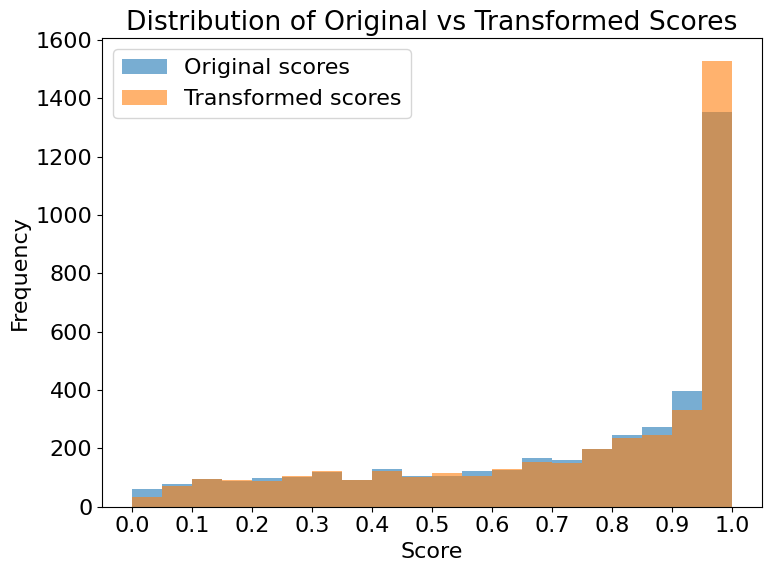

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Compute common range
xmin = min(comparison_df["score"].min(), comparison_df["transformed_score"].min())
xmax = max(comparison_df["score"].max(), comparison_df["transformed_score"].max())

# Round to one decimal for neat tick alignment
xmin = np.floor(xmin * 10) / 10
xmax = np.ceil(xmax * 10) / 10

# Bins: uniform across the full range, step of 0.05 (adjustable)
bins = np.arange(xmin, xmax + 0.05, 0.05)

# Plot
plt.figure(figsize=(8, 6))
plt.hist(comparison_df["score"], bins=bins, alpha=0.6, label="Original scores")
plt.hist(comparison_df["transformed_score"], bins=bins, alpha=0.6, label="Transformed scores")

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Original vs Transformed Scores")
plt.legend()

# Set x-axis ticks every 0.1
plt.xticks(np.arange(xmin, xmax + 0.1, 0.1))

plt.tight_layout()
plt.show()


In [23]:
# define inverse logit (sigmoid)
def inv_logit(x):
    return 1 / (1 + np.exp(-x))

# compute means
inv_logit_mean_score = inv_logit(comparison_df["score"]).mean()
inv_logit_mean_transformed = inv_logit(comparison_df["transformed_score"]).mean()

print(f"Inverse logit mean (original scores): {inv_logit_mean_score:.6f}")
print(f"Inverse logit mean (transformed scores): {inv_logit_mean_transformed:.6f}")

Inverse logit mean (original scores): 0.671366
Inverse logit mean (transformed scores): 0.674788
